In [ ]:
# (1) 8월 24일(화) 

- 한개 이상의 입력 변수와 결과값 사이의 선형 관계를 모델링하는 방법론입니다. 
- 선형 관계를 모델링 한다는 것은 1차로 이루어진 직선을 구하는 것입니다. 
- 우리의 데이터를 가장 설명하는 최적의 직선을 찾아냄으로써 입력변수와 결과값 사이의 관계를 도출해 내는 과정입니다. 
- 이번 시간에는 하나의 입력변수를 다루는 One Variable linear regrssion에 대해 다뤄보도록 하겠습니다. 

# 목차 
1. Linear regrssion    
    1.1 Analytically    
    1.2 Gradient Descent     
    1.3 Linear regression     


2. Earth temperature over time     
    2.1 read a data file    
    2.2 plot the data     
    2.3 analytically     
    

# 1. Linear regrssion
- Linear regrssion은 종속변수y와 한개 이상의 독립변수 X와의 선형 관계를 모델링하는 방법론입니다. 
- 독립변수는 입력값이나 원인을 나타내고
- 종속변수는 독립변수에 의해 영향을 받는 변수입니다. 보통 결과물을 나타냅니다. 
- 선형관계를 모델링 한다는 것은 1차로 이루어진 직선을 구하는 것입니다. 
- 우리의 데이터를 가장 잘 설명하는 최적의 직선을 찾아냄으로써 독립변수와 종속변수 사이의 관계를 도출해 내는 과정입니다. 
- 이번 실습에서는 독립변수가 1개인 simple linear regression을 진행하겠습니다. 
- 변수가 하나인 직선을 정의하겠습니다. 
$$f(x_i) = wx_i + b$$

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />


- 우리의 데이터를 가장 잘 설명하는 직선은 우리가 직선을 통해 예측한 값이 실제 데이터의 값과 가장 비슷해야 합니다. 
- 우리의 모델이 예측한 값은 위에서 알수 있듯이 $f(xi)$입니다.
- 그리고 실제 데이터는 $y$입니다. 
- 실제 데이터(위그림에서 빨간점)과 직선 사이의 차이를 줄이는 것이 우리의 목적입니다. 
- 그것을 바탕으로 cost function을 다음과 같이 정의 해보겠습니다. 


$$\text{cost function} = \frac{1}{N}\sum_{i=1}^n (y_i - f(x_i))^2$$


- 우리는 cost function을 최소로 하는 $w$와 $b$를 찾아야 합니다. 
- cost function은 이차합수입니다. 
- 이챃함수의 최솟값을 구하는 방법을 통해서 새로운 gradient descent방법도 알아보겠습니다. 

## 1.1 Analytically
- 다음식의 최솟값을 어떻게 찾을수 있을까?
     $f(w) = w^2 + 3w -5$
- 미분한 값이 0이 되는지점을 찾는 것입니다. 
- sympy와 numpy패키지를 사용하여 알아보도록 해보겠습니다. 

In [2]:
import sympy
import numpy 
from matplotlib import pyplot 

#질문 : 이건 뭐지?
%matplotlib inline 
sympy.init_printing()

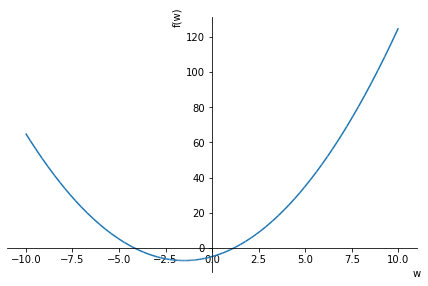

In [3]:
w = sympy.Symbol('w',real=True)

f = w**2 + 3*w - 5 
f

sympy.plotting.plot(f) 

# 1차 미분식 
fprime = f.diff(w)
fprime

# 해 구하기 
sympy.solve(fprime,w) # 질문 : 왜 이렇게 들어가지? 

## 1.2 Gradient Descent
- 두번째 방법은 오늘배운 Gradient Descent방법입니다. 
- 한번에 정답에 접근하는 것이 아닌 반복적으로 정답에 가까워지는 방법입니다. 
<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


In [6]:
# 먼저 기울기 앖을 구하는 함수를 만들겠습니다. 
fpnum = sympy.lambdify(w, fprime)
type(fpnum) # function

# 시작하는 w값을 설정한 뒤, 반복적으로 최솟값을 향해 접근해보겠습니다. 
w = 10.0 # starting guess for the min 

# 질문 : 2번 실행하면 왜 SyntaxError: invalid syntax 에러뜨지? 

SyntaxError: invalid syntax (<lambdifygenerated-3>, line 1)

In [7]:
for i in range(1000):
    w = w - fpnum(w)*0.01 # with 0.01 the step size 
    print(w)

9.77
9.544599999999999
9.323708
9.10723384
8.8950891632
8.687187379935999
8.483443632337279
8.283774759690534
8.088099264496723
7.896337279206788
7.7084105336226525
7.524242322950199
7.343757476491195
7.166882326961371
6.9935446804221435
6.823673786813701
6.6572003110774265
6.494056304855878
6.334175178758761
6.177491675183585
6.023941841679914
5.8734630048463154
5.725993744749389
5.581473869854402
5.439844392457314
5.301047504608167
5.165026554516004
5.0317260234256835
4.90109150295717
4.773069672898027
4.647608279440066
4.524656113851265
4.404162991574239
4.286079731742754
4.1703581371078995
4.0569509743657415
3.9458119548784265
3.836895715780858
3.7301578014652406
3.6255546454359355
3.523043552527217
3.4225826814766727
3.324131027847139
3.2276484072901965
3.133095439144393
3.040433530361505
2.949624859754275
2.8606323625591896
2.773419715308006
2.6879513210018455
2.6041922945818086
2.5221084486901724
2.441666279716369
2.3628329541220414
2.2855762950396006
2.2098647691388087
2.135667

- 이처럼 첫번째 방법과 두번째 방법에서 같은 값이 나오는 것을 알수 있습니다.
- Gradient descent방법을 직접 데이터를 만들어서 적용해보겠습니다. 

## 1.3 Linear regression
- 실제로 linear한 관계를 가진 데이터셋을 사용하기 위해서 직접 데이터를 만들어보겠습니다.
- numpy 패키지 않에 normal distribution 함수를 통해 조금의 noise를 추가해서 생성하도록 하겠습니다. 

(100,) (100,)


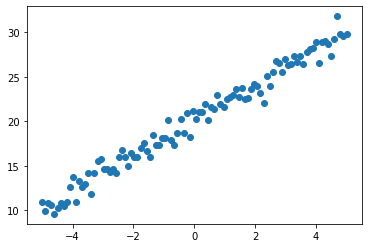

In [13]:
import numpy as np

x_data = np.linspace(-5,5,100)
w_true = 2 
b_true = 20 

y_data = w_true * x_data + b_true + np.random.normal(size=len(x_data))
pyplot.scatter(x_data, y_data)

# 질문 : w_true, b_true, y_data가 의미하는게 머지? 

print(x_data.shape, y_data.shape)

총 100개의 데이터를 생성하였습니다.    
이제 코드를 통해 접근해보겠습니다. 

먼저 cost function 만들기

In [17]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2 
cost_function # 질문 : 왜 식이 이렇게 나오는 걸까? 

gradient descent 예시에서 한것처럼 기울기 함수를 정의합니다. 

In [18]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y],cost_function.diff(w), 'numpy')

이제 $w$와 $b$의 초기값을 정의하고 gradient descent방법을 적용하여 cost function을 최소로 하는 $w$와 $b$값을 찾아보겠습니다. 

In [22]:
w = 0
b = 0

for i in range(1000):
    descent_b = np.sum(grad_b(w,b,x_data,y_data)/len(x_data))
    descent_w = np.sum(grad_w(w,b,x_data,y_data)/len(x_data))
    w = w - descent_w * 0.01 # with 0.01 the step size
    b = b - descent_b * 0.01 
    
print(w)
print(b)

# 질문 : 주신 자료랑 값이 차이가 있어도 되는건지? 

1.989968028068986
20.154522392077567


처음 데이터를 생성할 때 정의한 $w$,$b$값과 매우 유사한 값을 구할 수 있었습니다.

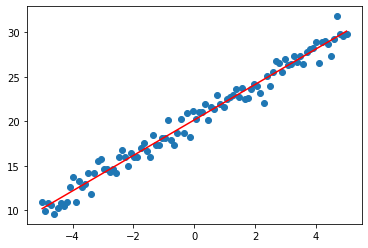

In [24]:
pyplot.scatter(x_data, y_data)
pyplot.plot(x_data, w * x_data + b, '-r')

우리가 구한 직선이 데이터와 잘 맞는 것을 확인할 수 있습니다.    
이번에는 실제 데이터에서 linear regression을 진행해보겠습니다. 

# 2. Earch temperature over time
- 오늘 배운 linear regression방법을 사용해서 시간 흐름에 따른 지구의 온도변화를 분석해 보겠습니다.
- Global temperature anomaly라는 지표를 통해 분석해보겠습니다.
- 여기서 temperatrue anamaly는 어떠한 기준 온도값을 정해놓고 그것과의 차이를 나타낸 것입니다. 
- 예를들어, temperature anomaly가 
    - 양수의 높은 값을 가진다면 평소보다 따듯한 기온을 가졌다는 것이고
    - 음수의 작은 값을 가진다면 평소보다 차가운 기온을 가졌다는 말입니다. 
- 세계 여러지역의 온도가 각각 다르기때문에 global temperature anomaly를 사용해서 분석하도록 하겠습니다. 
- 자세한 내용은 아래 링크에서 확인하실 수 있습니다. 
- https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php

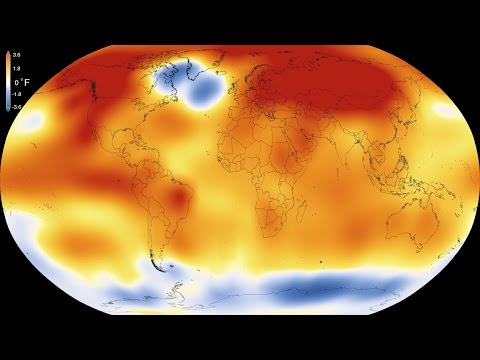

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

## 2.1 step1.Read a data file
- NOAA(National Oceanic and Atmospheric Administration) 홈페이지에서 데이터를 가져오겠습니다.
- 아래 명령어로 데이터를 다운받겠습니다.

In [26]:
from urllib.request import urlretrieve 

URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7fd78c4a0460>)

다운로드한 데이터를 numpy패키지를 이용해 불러오겠습니다.

In [28]:
import numpy as np

fname = './land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = np.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

## 2.2 step2.plot the data
- Matplotlib패키지의 pyplot을 이용해서 2D plot을 찍어보겠습니다. 

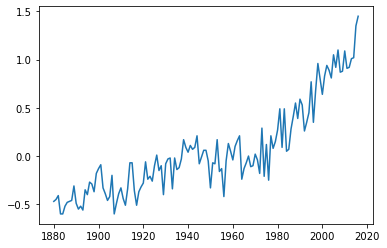

In [37]:
from matplotlib import pyplot 

pyplot.plot(year, temp_anomaly)

plot에 여러정보를 추가해서 더 보기 좋게 출력해보겠습니다. 

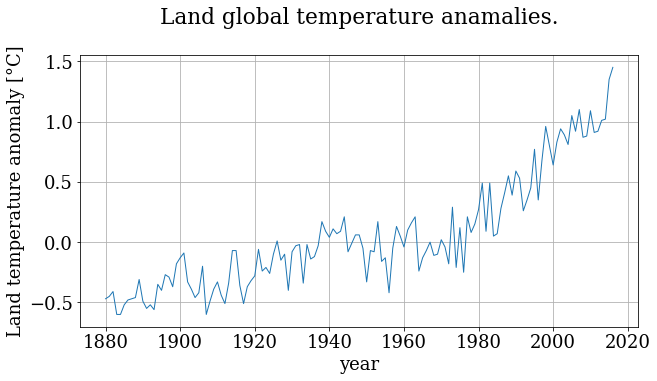

In [42]:
pyplot.rc('font', family='serif', size='18')

pyplot.figure(figsize=(10,5))

pyplot.plot(year, temp_anomaly, linestyle='-', linewidth=1)
pyplot.title('Land global temperature anamalies.\n')
pyplot.xlabel('year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

## 2.3 step3. Analytically

1. Linear regression을 하기 위해서 먼저 직선을 정의하겠습니다. 
    $$f(x_i) = wx + b$$    
    그 다음 수업 시간에 배운 cost function을 정의하도록 하겠습니다.     
    우리가 최소화 해야 할 cost function은 다음과 같습니다.     
    $$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$    
    이제 cost function 을 구하고자 하는 변수로 미분한 뒤 0이 되도록 하는 값을 찾으면 됩니다. 


2. 먼저 $b$에 대해서 미분을 하겠습니다.    
    $$\frac{\partial{J(w,b)}}{\partial{b}} = \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b)) = \frac{2}{n}\left(b + w\sum_{i=1}^n x_i -\sum_{i=1}^n y_i\right) = 0$$
    위 식을 만족하는 $b$에 대해서 정리하면    
    $$b = \bar{y} - w\bar{x}$$
    여기서  $\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$ , $\bar{y} = \frac{\sum_{i=1}^n y_i}{n}$ 입니다. 


3. 이제 $w$에 대해서 미분을 하겠습니다.    
    $$\frac{\partial{J(w,b)}}{\partial{w}} =  \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b))x_i = \frac{2}{n}\left(b\sum_{i=1}^nx_i + w\sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_iy_i\right)$$    
    여기에 아까 구한 $b$를 대입한 후 0이 되는 $w$값을 구하면 아래가 됩니다.    
    $$w = \frac{\sum_{i=1}^ny_i(x_i-\bar{x_i})}{\sum_{i=1}^nx_i(x_i-\bar{x_i})}$$

 

우리는 계산을 통해서 $w$와 $b$ 값을 구했습니다. 

In [43]:
# 코드로 적용해보기 

w = np.sum(temp_anomaly * (year - year.mean())) / np.sum(year * (year - year.mean()))
b = a_0 = temp_anomaly.mean() - w * year.mean() 

print(w, b)

0.01037028394347266 -20.148685384658464


그래프로 그려서 확인해보기

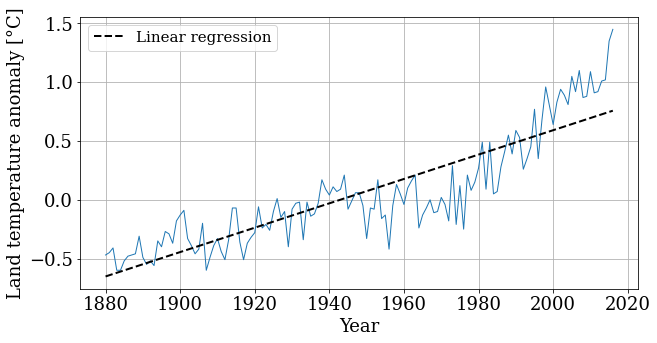

In [47]:
reg = b + w * year 

pyplot.figure(figsize = (10,5))

pyplot.plot(year, temp_anomaly, linestyle = '-', linewidth=1)
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression')

pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid()

In [48]:
# -- 끝 -- 